<a href="https://colab.research.google.com/github/s1mphiw3/Custommer-Behaviour-Prediction-Model/blob/main/Forecasting_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
from statsmodels.graphics import tsaplots
import statsmodels.api as sm
from pylab import rcParams
import itertools
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import sys

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data= pd.read_excel('/content/drive/MyDrive/Global_Superstore_2018.xlsx')
#data= pd.read_excel('../MRP_data.xls')

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.820,2,0.0,102.420,39.66,Medium
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.540,9,0.0,104.490,18.72,Medium
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.320,3,0.0,13.770,14.10,Medium
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.680,4,0.0,79.680,11.01,Medium
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.880,4,0.0,24.360,5.72,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,46231,ZA-2014-AS285147-41718,2014-03-20,2014-03-25,Standard Class,AS-285147,Alejandro Savely,Corporate,NaN,Harare,...,OFF-AR-5911,"Sanford Highlighters, Easy-Erase",Art,Office Supplies,9.612,2,0.7,-21.168,1.02,Medium
51286,50122,ZA-2017-HG4965147-42876,2017-05-21,2017-05-23,Second Class,HG-4965147,Henry Goldwyn,Corporate,NaN,Mutare,...,OFF-LA-3260,"Avery Color Coded Labels, 5000 Label Set",Labels,Office Supplies,4.104,1,0.7,-4.806,1.80,High
51287,50297,ZA-2016-EB3870147-42499,2016-05-09,2016-05-15,Standard Class,EB-3870147,Emily Burns,Consumer,NaN,Mutare,...,OFF-AR-5922,"Sanford Pencil Sharpener, Fluorescent",Art,Office Supplies,7.749,1,0.7,-9.051,1.46,Medium
51288,47164,ZA-2015-JG5115147-42040,2015-02-05,2015-02-10,Standard Class,JG-5115147,Jack Garza,Consumer,NaN,Kadoma,...,TEC-MA-5542,"Panasonic Card Printer, Durable",Machines,Technology,104.364,2,0.7,-173.976,7.46,Medium


In [6]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.478567
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.251373
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,1.002000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Pr

In [8]:
data.shape

(51290, 24)

In [9]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Postal Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product ID', 'Product Name',
       'Sub-Category', 'Category', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Order Priority'],
      dtype='object')

In [10]:
 #check for null values
data.isnull().sum().any()

True

In [11]:
data.shape

(51290, 24)

In [12]:
pd.DataFrame(data.isnull().sum(), columns = ["Number of missing values"])

,Number of missing values
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Postal Code,41296
City,0


In [13]:
data = data.drop('Postal Code', axis=1)

In [14]:
 #check for null values
data.isnull().sum().any()

False

In [15]:
data.shape

(51290, 23)

In [16]:
# Lower case column names
data.columns = map(str.lower, data.columns)

#Replace spaces with '_'
data.columns = data.columns.str.replace(" ", "_")
data.columns = data.columns.str.replace("-", "_")
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'region', 'market', 'product_id', 'product_name', 'sub_category',
       'category', 'sales', 'quantity', 'discount', 'profit', 'shipping_cost',
       'order_priority'],
      dtype='object')

In [17]:
for c in data.columns:
    if len(set(data[c]))<20:
        print(c,set(data[c]))

ship_mode {'Second Class', 'First Class', 'Standard Class', 'Same Day'}
segment {'Consumer', 'Home Office', 'Corporate'}
market {'LATAM', 'USCA', 'Asia Pacific', 'Europe', 'Africa'}
sub_category {'Labels', 'Paper', 'Binders', 'Envelopes', 'Bookcases', 'Storage', 'Furnishings', 'Phones', 'Appliances', 'Machines', 'Accessories', 'Art', 'Chairs', 'Fasteners', 'Tables', 'Copiers', 'Supplies'}
category {'Furniture', 'Office Supplies', 'Technology'}
quantity {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
order_priority {'Critical', 'Low', 'Medium', 'High'}


In [18]:
pip install -U kaleido

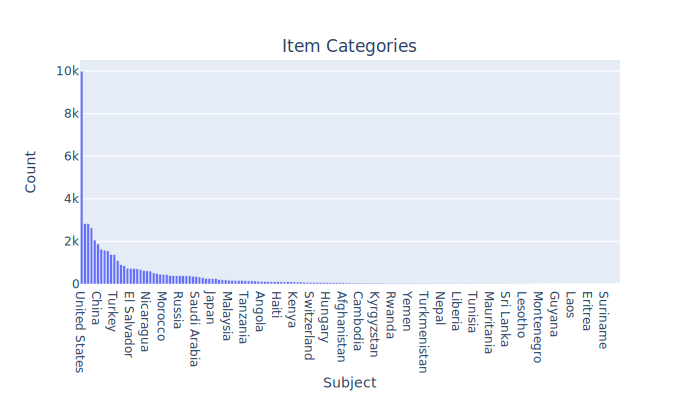

In [19]:
a = data['country'].value_counts()
fig = px.bar(a, x=a.index, y=a.values, height=400)
fig.update_layout( title={
        'text': "Item Categories",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Subject",
    yaxis_title="Count")
fig.show(renderer='svg')

In [20]:
a

United States    9994
Australia        2837
France           2827
Mexico           2635
Germany          2063
                 ... 
Suriname            1
Kuwait              1
Malawi              1
The Gambia          1
Bhutan              1
Name: country, Length: 165, dtype: int64

In [21]:
data= data[data['country']== 'United States'].reset_index()

In [22]:
data
data['country']

0       United States
1       United States
2       United States
3       United States
4       United States
            ...      
9989    United States
9990    United States
9991    United States
9992    United States
9993    United States
Name: country, Length: 9994, dtype: object

In [23]:
a = data['category'].value_counts()
fig = px.bar(a, x=a.index, y=a.values, height=400)
fig.update_layout( title={
        'text': "Item Categories",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Subject",
    yaxis_title="Count")
fig.show()

In [24]:
df_furniture=data.loc[data['category'] == 'Furniture']
df_technology=data.loc[data['category'] == 'Technology']
df_office=data.loc[data['category'] == 'Office Supplies']

In [25]:
#Aggregating sales by order date
furniture= df_furniture.groupby('order_date')['sales'].sum().reset_index()
technology= df_technology.groupby('order_date')['sales'].sum().reset_index()
office= df_office.groupby('order_date')['sales'].sum().reset_index()

In [26]:
#Set index
furniture = furniture.set_index('order_date')
technology = technology.set_index('order_date')
office = office.set_index('order_date')

In [27]:
df_office.shape

(6042, 24)

In [28]:
office.index

DatetimeIndex(['2014-01-04', '2014-01-05', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-10', '2014-01-11', '2014-01-14',
               '2014-01-17', '2014-01-19',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='order_date', length=1148, freq=None)

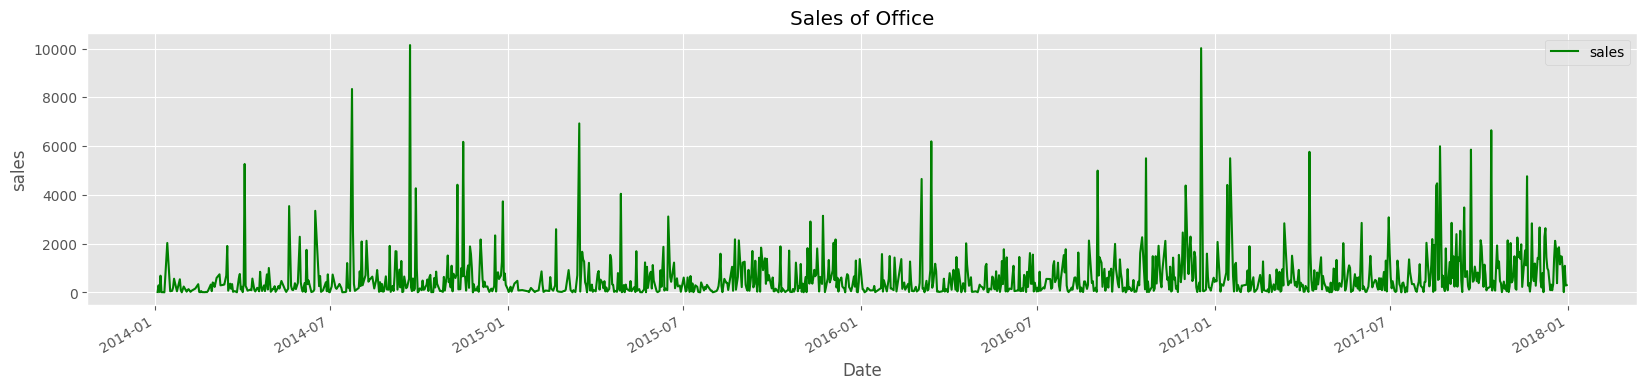

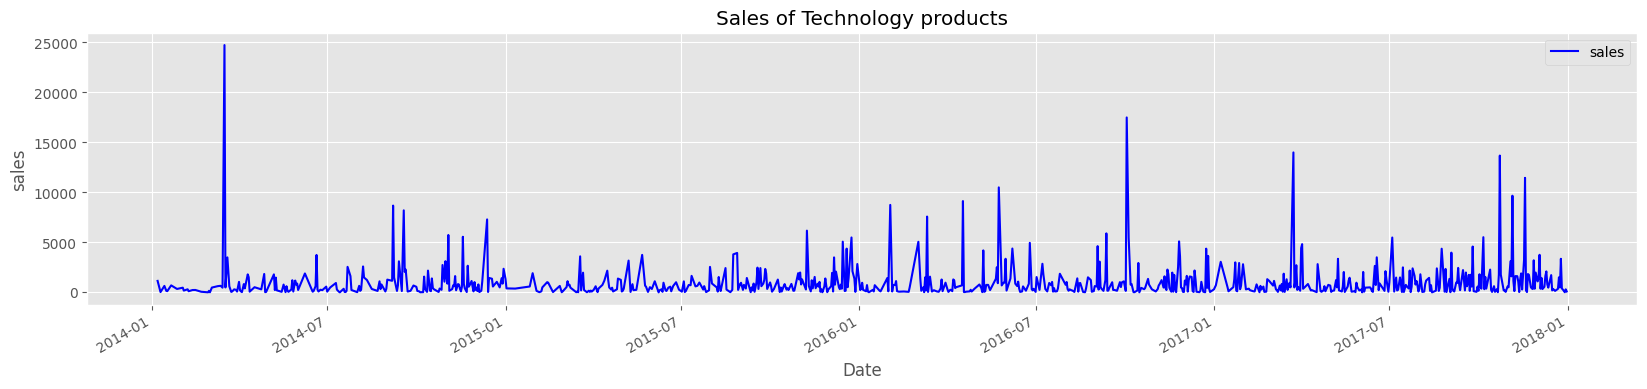

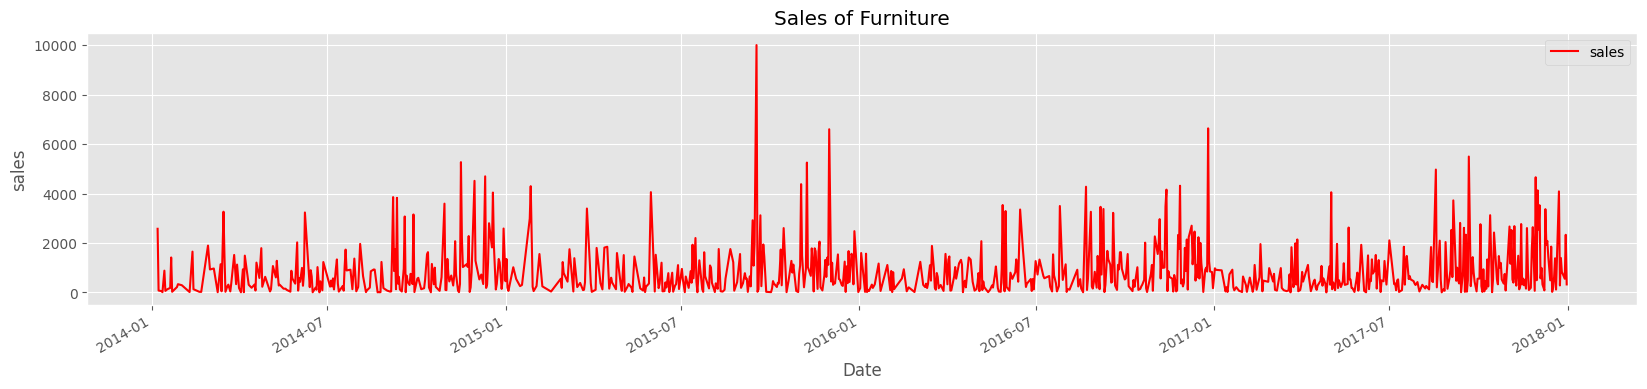

In [29]:
office_sales = office[['sales']]
office_sales.plot(color='green',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Office")
plt.show()

technology_sales = technology[['sales']]
ax= technology_sales.plot(color='blue',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Technology products")
plt.show()

furniture_sales = furniture[['sales']]
furniture_sales.plot(color='red',figsize=(20,4))
plt.xlabel("Date")
plt.ylabel('sales')
plt.title("Sales of Furniture")
plt.show()

In [30]:
# Using averages daily sales value - set start of the month as index
avg_furniture_sales = furniture_sales['sales'].resample('MS').mean()
avg_technology_sales = technology_sales['sales'].resample('MS').mean()
avg_office_sales = office_sales['sales'].resample('MS').mean()

In [31]:
avg_office_sales.shape

(48,)

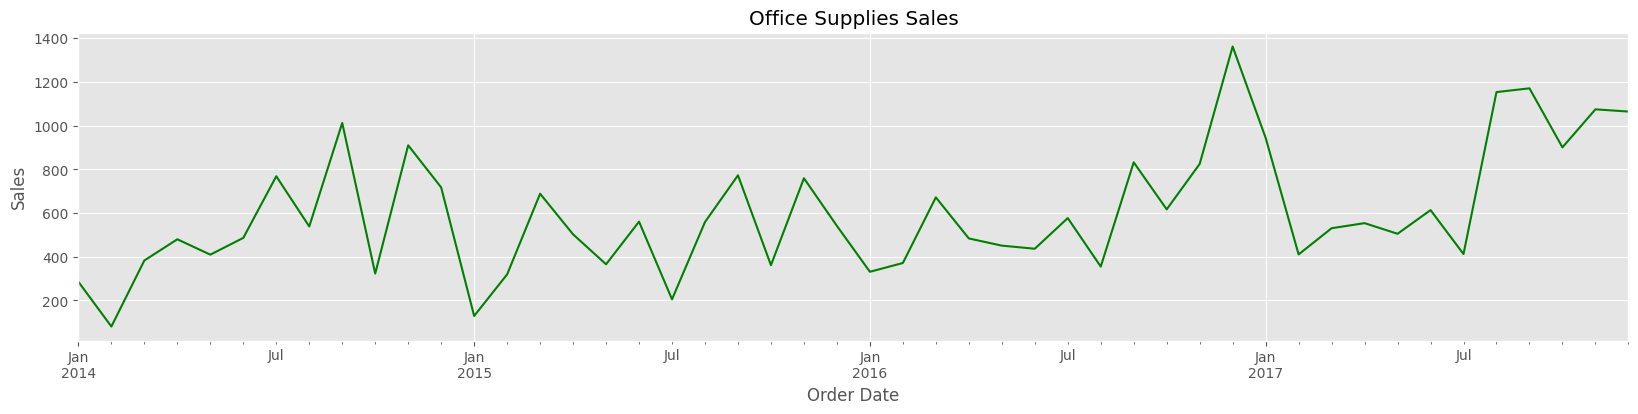

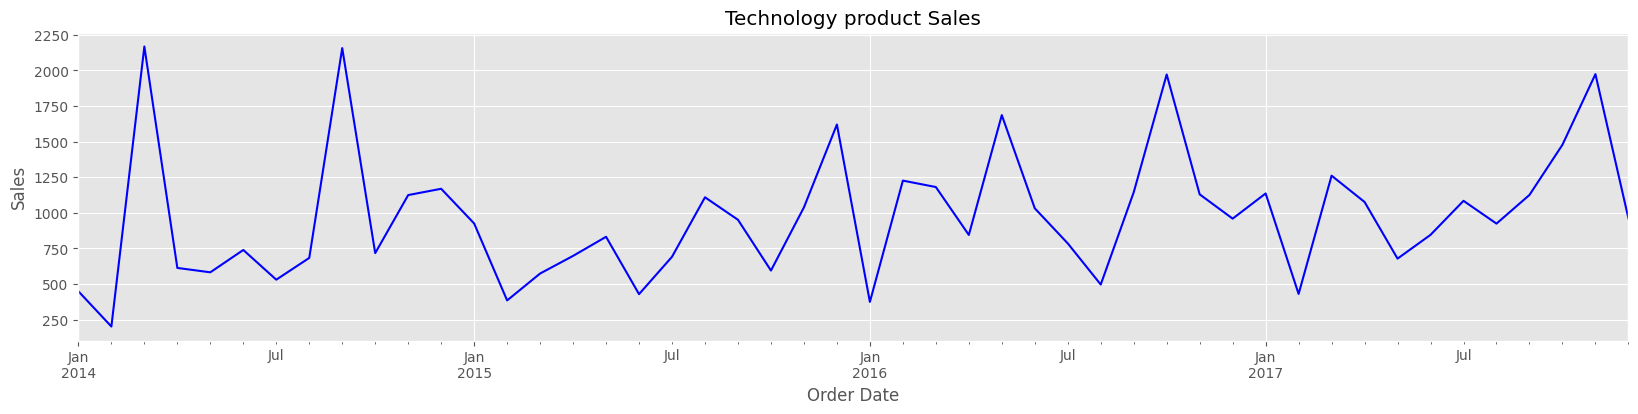

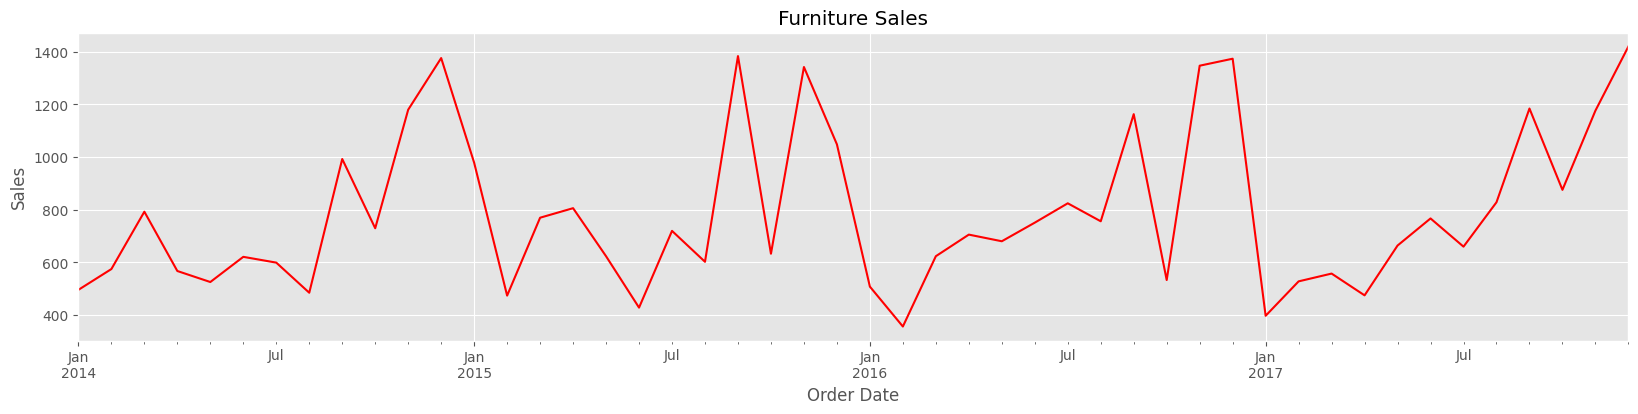

In [32]:
avg_office_sales.plot(figsize=(20, 4),color='green')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Office Supplies Sales")
plt.show()

avg_technology_sales.plot(figsize=(20, 4),color='blue')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Technology product Sales")
plt.show()

avg_furniture_sales.plot(figsize=(20, 4),color='red')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Furniture Sales")
plt.show()

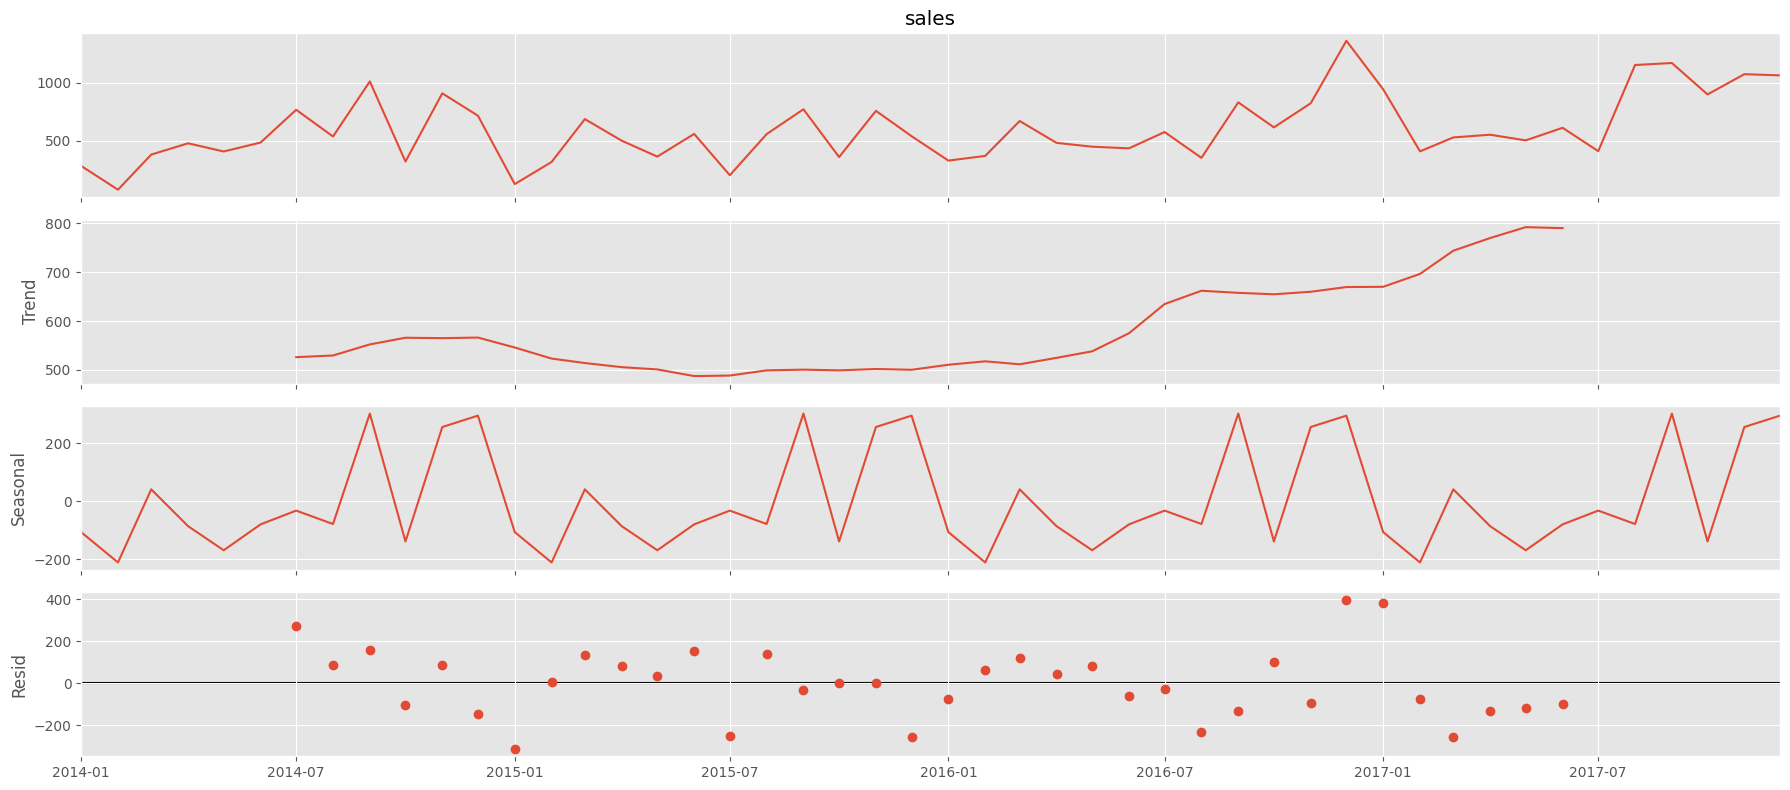

In [33]:
#Furniture sales time-series decomposition
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(avg_office_sales, model='additive')
fig = decomposition.plot()
plt.show()

In [34]:
states_profit = df_furniture.groupby('state').sum()['sales']
states_profit_df= pd.DataFrame(data=states_profit,columns=['sales']).reset_index()

<ipython-input-34-7e69900b8710>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [35]:
states_profit_df

,state,sales
0,Alabama,6332.4800
1,Arizona,13525.2910
2,Arkansas,3187.5500
3,California,155933.5815
4,Colorado,13219.6610
5,Connecticut,5174.9870
6,Delaware,4759.3190
7,District of Columbia,1346.5800
8,Florida,22967.9340
9,Georgia,8321.4800


In [36]:
states_profit_df = states_profit_df.replace(r"'","", regex=True)

In [37]:
us_state_abbrev = {
    'Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR','California': 'CA',
    'Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC','Florida': 'FL',
    'Georgia': 'GA','Guam': 'GU','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA',
    'Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA',
    'Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE',
    'Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY',
    'North Carolina': 'NC','North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK',
    'Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR','Rhode Island': 'RI','South Carolina': 'SC',
    'South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virgin Islands': 'VI',
    'Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
}

In [38]:
# list_abv = []
# for state in states_profit_df['state']:
#     list_abv.append(us_state_abbrev[state])

list_abv = []
for state in states_profit_df['state']:
    if state in us_state_abbrev:
        list_abv.append(us_state_abbrev[state])
    else:
        print(f"State abbreviation not found for {state}")
        list_abv.append(None) # add None to the list as a placeholder for the missing abbreviation


In [39]:
list_abv

['AL',
 'AZ',
 'AR',
 'CA',
 'CO',
 'CT',
 'DE',
 'DC',
 'FL',
 'GA',
 'ID',
 'IL',
 'IN',
 'IA',
 'KS',
 'KY',
 'LA',
 'ME',
 'MD',
 'MA',
 'MI',
 'MN',
 'MS',
 'MO',
 'MT',
 'NE',
 'NV',
 'NH',
 'NJ',
 'NM',
 'NY',
 'NC',
 'OH',
 'OK',
 'OR',
 'PA',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VT',
 'VA',
 'WA',
 'WV',
 'WI',
 'WY']

In [40]:
states_profit_df['code']=list_abv

In [41]:
states_profit_df.head(50)


,state,sales,code
0,Alabama,6332.4800,AL
1,Arizona,13525.2910,AZ
2,Arkansas,3187.5500,AR
3,California,155933.5815,CA
4,Colorado,13219.6610,CO
5,Connecticut,5174.9870,CT
6,Delaware,4759.3190,DE
7,District of Columbia,1346.5800,DC
8,Florida,22967.9340,FL
9,Georgia,8321.4800,GA


In [42]:
state_data = dict(type='choropleth',
            colorscale = 'RdBu',
            locations = states_profit_df['code'],
            z = np.round(states_profit_df['sales'],2),
            locationmode = 'USA-states',
            text = states_profit_df['state'],
            marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
            colorbar = {'title':"USD"}
            )

In [43]:
layout = dict(title='Map of the States based on the amount of sales',geo = {'scope':'usa'})

In [44]:
pip install plotly

In [45]:
import plotly as py
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [46]:
choromap = go.Figure(data = [state_data],layout = layout)

In [47]:
iplot(choromap)

In [48]:
#pip install -U kaleido

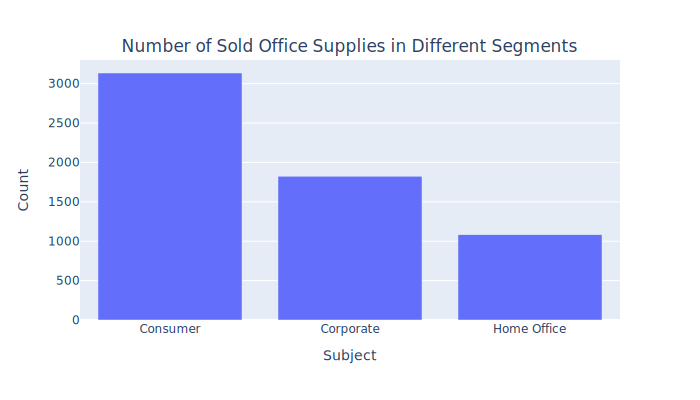

In [49]:
b = df_office['segment'].value_counts()
fig = px.bar(b, x=b.index, y=b.values, height=400)
fig.update_layout( title={
        'text': "Number of Sold Office Supplies in Different Segments",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Subject",
    yaxis_title="Count")
fig.show(renderer='svg')

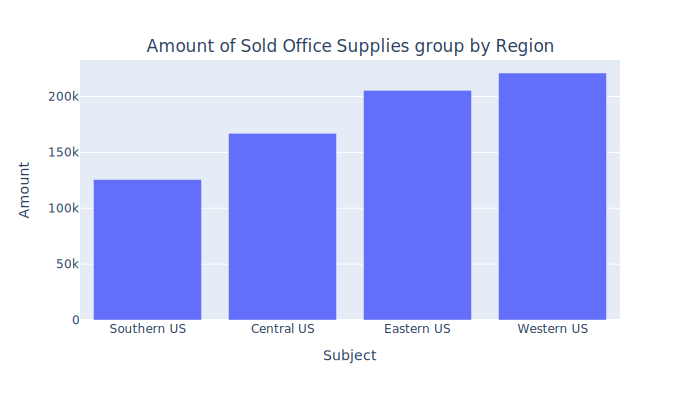

region
Southern US    125701.585
Central US     167131.003
Eastern US     205605.207
Western US     221031.525
Name: sales, dtype: float64

In [50]:
c = df_office.groupby('region')['sales'].sum().sort_values()
fig = px.bar(c, x=c.index, y=c.values, height=400)
fig.update_layout( title={
        'text': "Amount of Sold Office Supplies group by Region",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Subject",
    yaxis_title="Amount")
fig.show(renderer='svg')

c

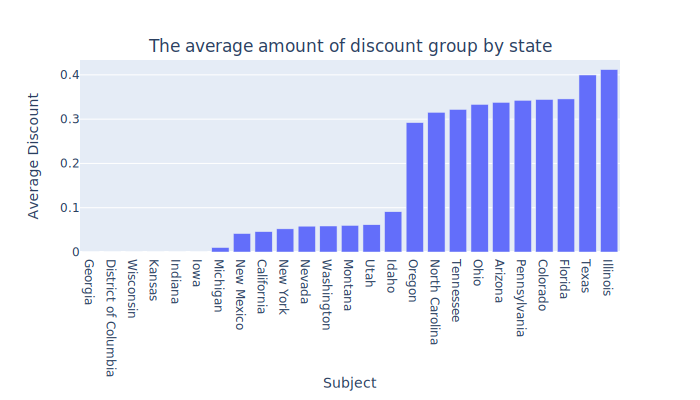

state
Georgia                 0.000000
District of Columbia    0.000000
Wisconsin               0.000000
Kansas                  0.000000
Indiana                 0.000000
Iowa                    0.000000
Michigan                0.010063
New Mexico              0.041667
California              0.045962
New York                0.052263
Nevada                  0.058333
Washington              0.058703
Montana                 0.060000
Utah                    0.061538
Idaho                   0.090909
Oregon                  0.292105
North Carolina          0.315385
Tennessee               0.321849
Ohio                    0.333212
Arizona                 0.337795
Pennsylvania            0.342442
Colorado                0.344330
Florida                 0.345652
Texas                   0.399671
Illinois                0.411847
Name: discount, dtype: float64

In [51]:
d = df_office.groupby('state')['discount'].mean().sort_values()[-25:]
fig = px.bar(d, x=d.index, y=d.values, height=400)
fig.update_layout( title={
        'text': "The average amount of discount group by state",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Subject",
    yaxis_title="Average Discount")
fig.show(renderer='svg')

d

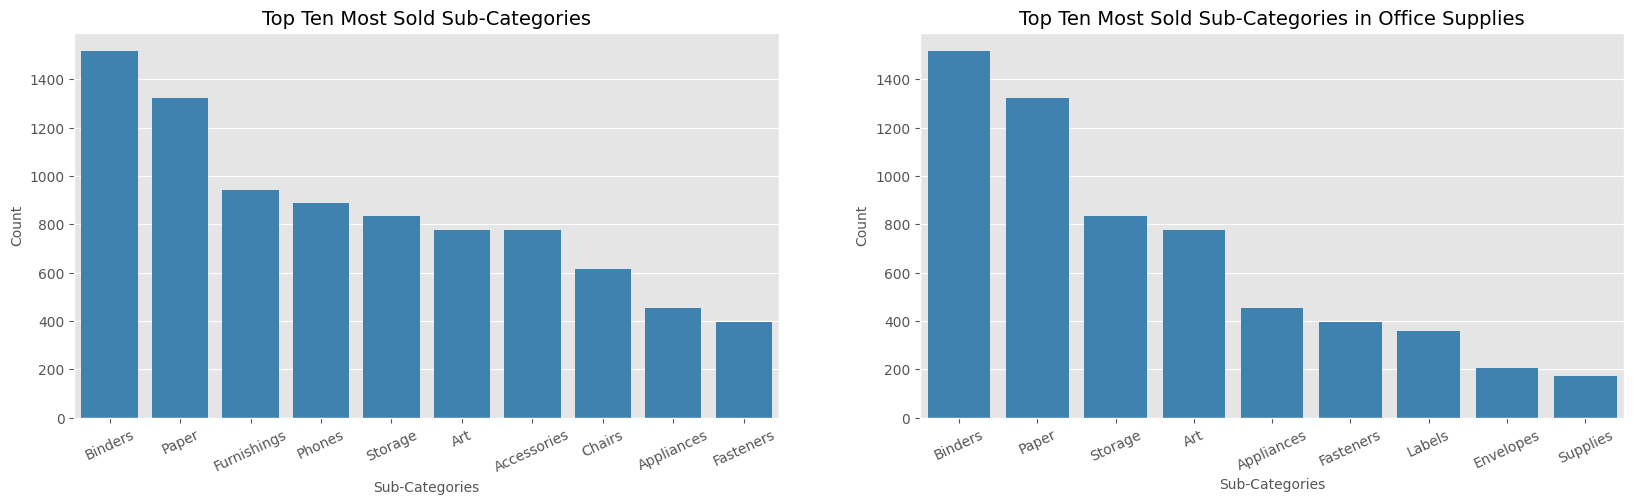

In [52]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.barplot(x=data['sub_category'].value_counts().sort_values(ascending=False)[:10].index,
           y=data['sub_category'].value_counts().sort_values(ascending=False)[:10].values,color='#2E86C1')
plt.title('Top Ten Most Sold Sub-Categories',size=14)
plt.xticks(rotation=25)
plt.xlabel('Sub-Categories',size=10)
plt.ylabel('Count',size=10)

plt.subplot(1,2,2)
sns.barplot(x=df_office['sub_category'].value_counts().sort_values(ascending=False)[:10].index,
           y=df_office['sub_category'].value_counts().sort_values(ascending=False)[:10].values,color='#2E86C1')
plt.title('Top Ten Most Sold Sub-Categories in Office Supplies',size=14)
plt.xticks(rotation=25)
plt.xlabel('Sub-Categories',size=10)
plt.ylabel('Count',size=10)

plt.show()

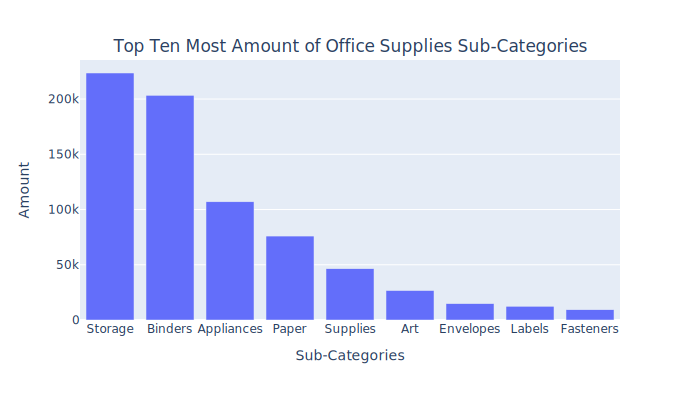

In [53]:
f = df_office.groupby('sub_category')['sales'].sum().sort_values(ascending=False)
fig = px.bar(f, x=f.index, y=f.values, height=400)
fig.update_layout( title={
        'text': "Top Ten Most Amount of Office Supplies Sub-Categories",
        'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'},
    xaxis_title="Sub-Categories",
    yaxis_title="Amount")
fig.show(renderer='svg')

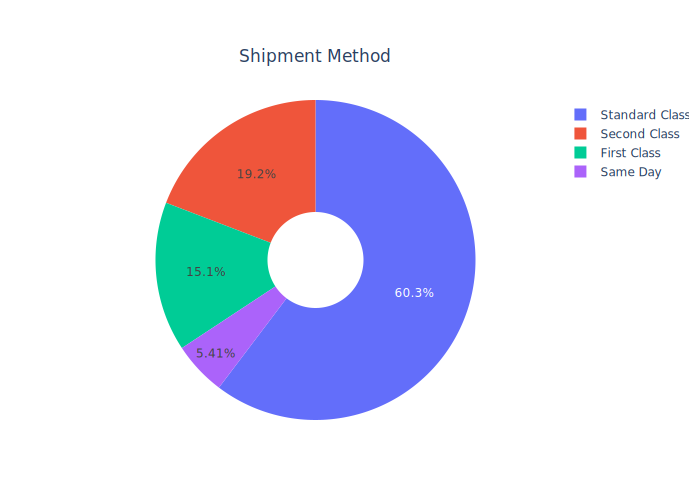

In [54]:
g= df_office['ship_mode'].value_counts()

labels = g.index
values = g.values


# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout( title={
        'text': "Shipment Method",
        'y':0.9,'x':0.45,'xanchor': 'center','yanchor': 'top'})
fig.show(renderer='svg')

In [55]:
data['quantity'].sum()

37873

In [56]:
#Quantity grouped by region
data.groupby(['region'])['quantity'].sum()

region
Central US      8780
Eastern US     10618
Southern US     6209
Western US     12266
Name: quantity, dtype: int64

<ipython-input-57-7aeaf809b544>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



(7.5, -0.5)

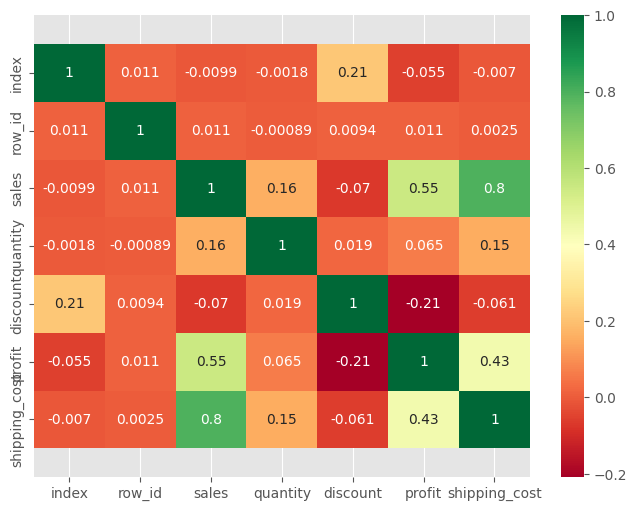

In [57]:
df_corr = df_office.corr()
plt.figure(figsize=(8,6))
ax = sns.heatmap(df_corr, annot=True,cmap='RdYlGn') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [58]:
#Resampling the data on monthly frequency
# Using averages daily sales value - set start of the month as index
#df = furniture['sales'].resample('MS').mean()
#df= df.to_frame()


#df =avg_furniture_sales

#avg_technology_sales = technology_sales['sales'].resample('MS').mean()
df = office['sales'].resample('MS').mean()

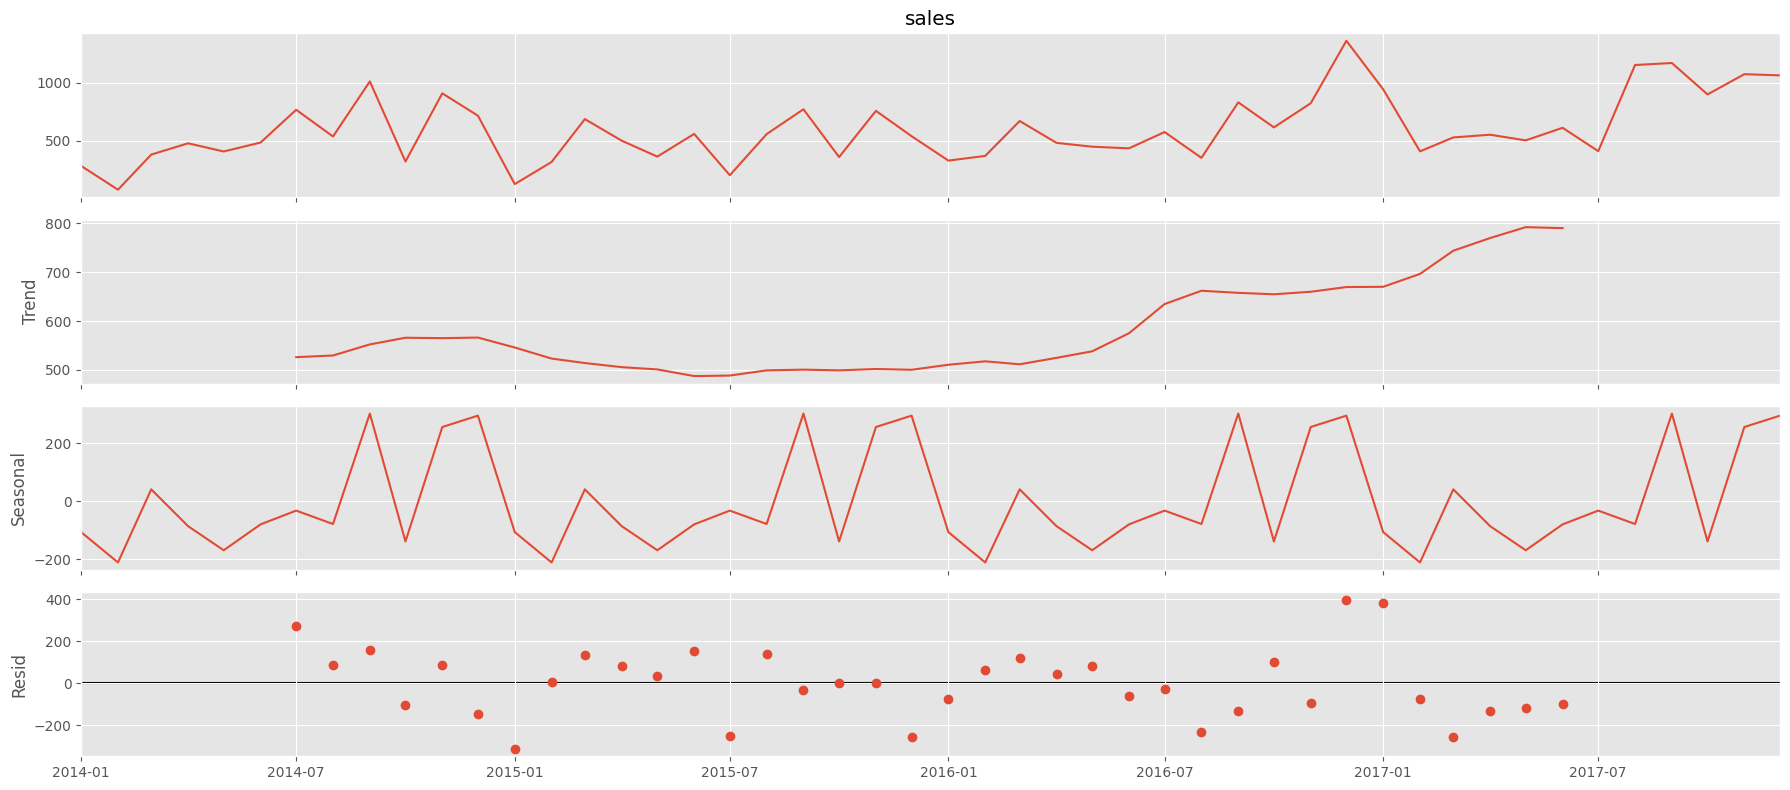

In [59]:
df
#Furniture sales time-series decomposition
rcParams['figure.figsize'] = 18, 8
decomposition = seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

In [60]:
df.dtypes

dtype('float64')

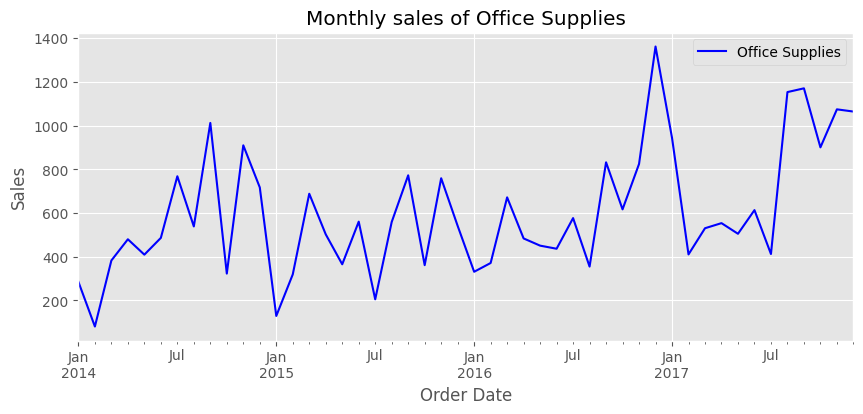

In [61]:
df.plot(figsize=(10, 4),color='blue',label = 'Office Supplies')

#avg_technology_sales.plot(figsize=(10, 4),color='red',label = 'Technology')

#avg_office_sales.plot(figsize=(10, 4),color='green',label = 'Office Supplies')
plt.xlabel("Order Date")
plt.ylabel('Sales')
plt.title("Monthly sales of Office Supplies")
plt.legend()
plt.show()

In [62]:
def test_stationarity(timeseries):
    rcParams['figure.figsize'] = 10, 6
    rolmean = timeseries.rolling(12).mean() #allows you to calculate moving avg
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    print('p-value=', dftest[1])

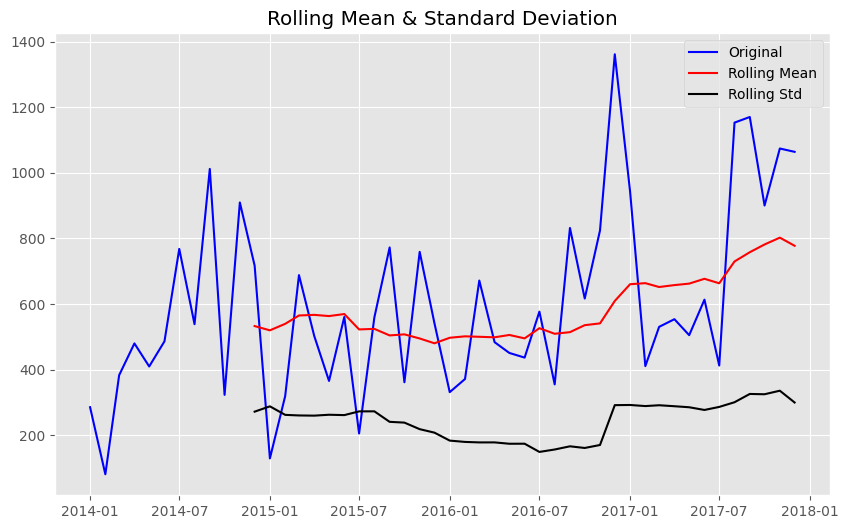

Results of Dickey-Fuller Test:
p-value= 0.00022348574262344168


In [63]:
#check to see if the time-series is stationary or non-stationary
test_stationarity(df)
#p-value= 9.168756655665942e-06

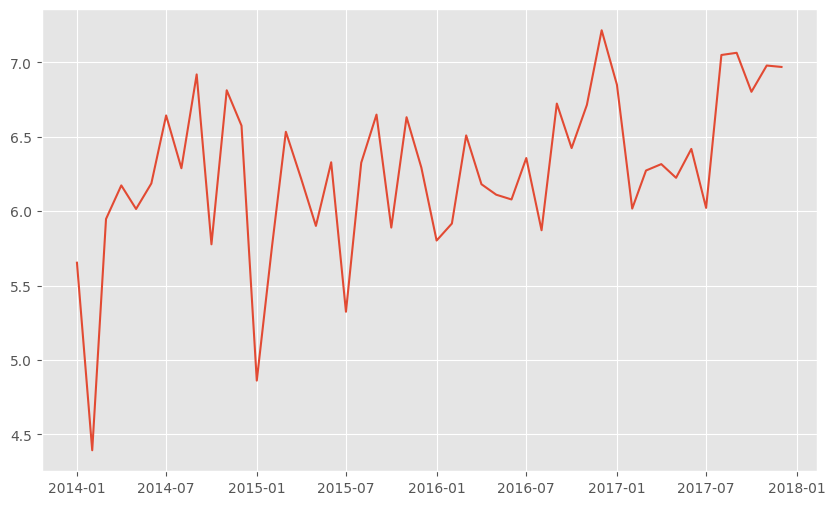

In [64]:
ts_log = np.log(df)
plt.plot(ts_log)

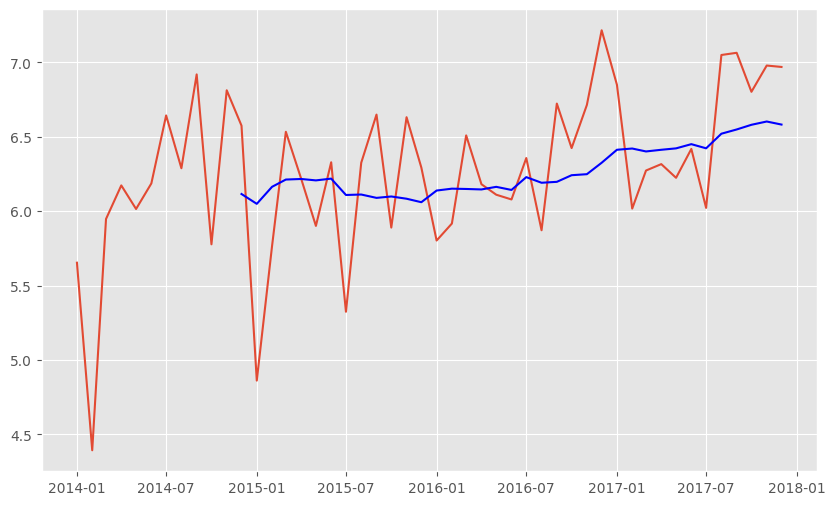

In [65]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg,color='blue')

In [66]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(100)

order_date
2014-01-01         NaN
2014-02-01         NaN
2014-03-01         NaN
2014-04-01         NaN
2014-05-01         NaN
2014-06-01         NaN
2014-07-01         NaN
2014-08-01         NaN
2014-09-01         NaN
2014-10-01         NaN
2014-11-01         NaN
2014-12-01    0.459485
2015-01-01   -1.188125
2015-02-01   -0.397998
2015-03-01    0.321045
2015-04-01    0.002721
2015-05-01   -0.305973
2015-06-01    0.109743
2015-07-01   -0.784896
2015-08-01    0.213773
2015-09-01    0.559746
2015-10-01   -0.208949
2015-11-01    0.547952
2015-12-01    0.233104
2016-01-01   -0.336013
2016-02-01   -0.234430
2016-03-01    0.360068
2016-04-01    0.035082
2016-05-01   -0.052880
2016-06-01   -0.064004
2016-07-01    0.128287
2016-08-01   -0.319216
2016-09-01    0.526049
2016-10-01    0.182392
2016-11-01    0.465611
2016-12-01    0.890451
2017-01-01    0.436865
2017-02-01   -0.403724
2017-03-01   -0.128189
2017-04-01   -0.096395
2017-05-01   -0.197909
2017-06-01   -0.032028
2017-07-01   -0.400651


In [67]:
ts_log_moving_avg_diff.dropna(inplace = True)
ts_log_moving_avg_diff.head()

order_date
2014-12-01    0.459485
2015-01-01   -1.188125
2015-02-01   -0.397998
2015-03-01    0.321045
2015-04-01    0.002721
Freq: MS, Name: sales, dtype: float64

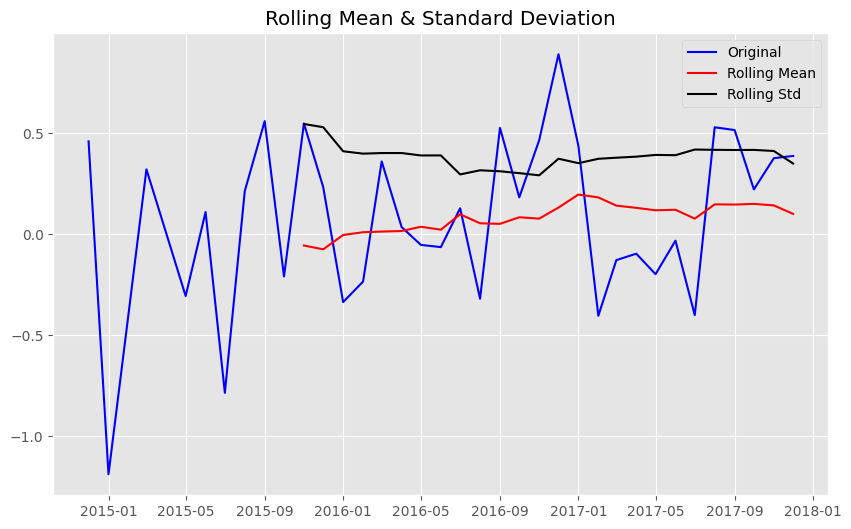

Results of Dickey-Fuller Test:
p-value= 2.64851029713956e-06


In [68]:
test_stationarity(ts_log_moving_avg_diff)

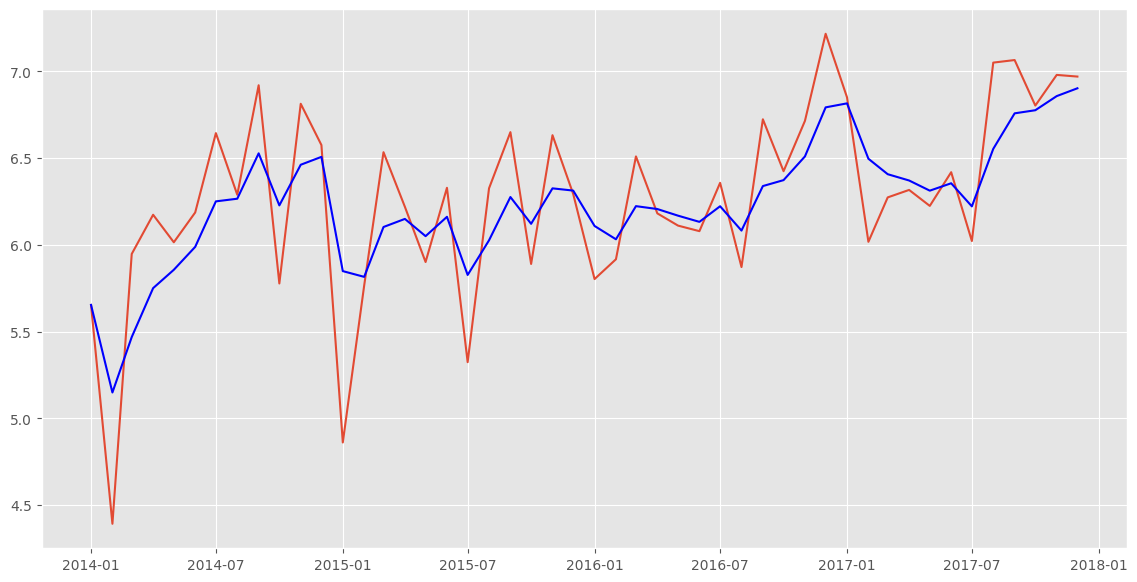

In [107]:
exp_wg = ts_log.ewm(span=4, adjust=False).mean()
plt.plot(ts_log)
plt.plot(exp_wg, color ='blue')

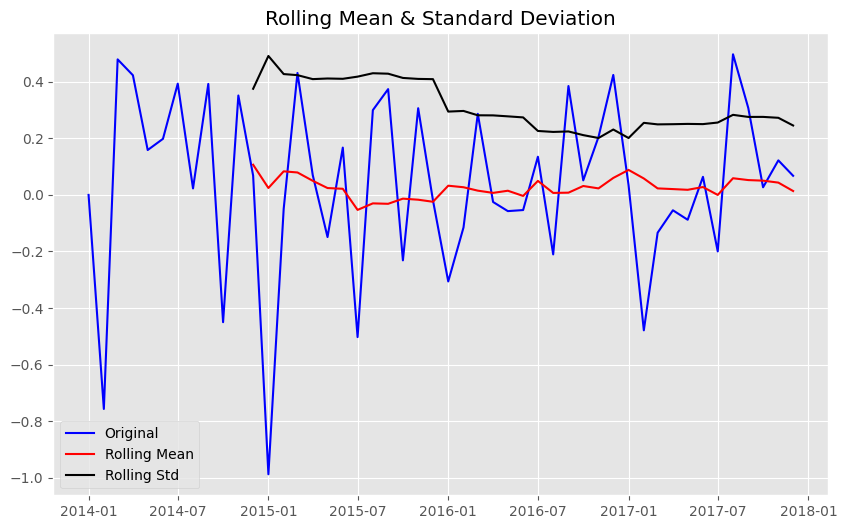

Results of Dickey-Fuller Test:
p-value= 0.000866323883785061


In [108]:
ts_log_wma_diff = ts_log - exp_wg
test_stationarity(ts_log_wma_diff)

# Train Test Split

In [70]:
X = df
train_size = int(len(X) * 0.75)
trainset, testset= X[0:train_size], X[train_size:]

# Measure of prediction accuracy

In [71]:
def performance(y_true, y_pred):
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    performance_data= {'MSE':round(mse, 2),
                      'RMSE':round(np.sqrt(mse), 2),
                       'MAPE':round(mape, 2)
                      }
    return performance_data

def performance2(y_true, y_pred):
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print(' The MSE of forecasts is {}'.format(round(mse, 2))+
                  '\n The RMSE of forecasts is {}'.format(round(np.sqrt(mse), 2))+
                  '\n The MAPE of forecasts is {}'.format(round(mape, 2))))

# ARIMA Grid Search

In [72]:
import warnings
from pandas import Series
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.75)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

# evaluate the combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [73]:
# evaluate parameters
p_values = [0, 1, 2, 4,6]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(df, p_values, d_values, q_values)

Best ARIMANone MSE=inf


In [74]:
from statsmodels.tsa.arima.model import ARIMA
model_arima = ARIMA(trainset, order = (6,0,0))
model_arima_fit = model_arima.fit()
arima_predict = model_arima_fit.predict(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2017-12-01')
                                           ,dynamic=False)

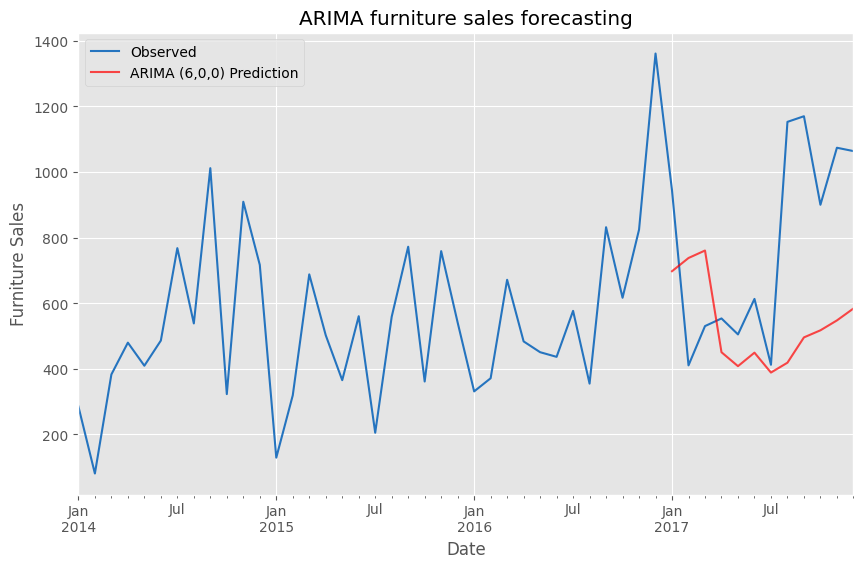

In [75]:
# One step ahead forecast
#observed plot
ax = df.plot(label='Observed',color='#2574BF')
#predicted plot
rcParams['figure.figsize'] = 14, 7
arima_predict.plot(ax=ax, label='ARIMA (6,0,0) Prediction', alpha= 0.7, color='red')
plt.title('ARIMA furniture sales forecasting')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.show()

In [76]:
arima_results= performance(df[-12:],arima_predict)
arima_results

{'MSE': 159612.31, 'RMSE': 399.52, 'MAPE': 39.79}

# arima grid search 2

In [77]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 6.2 MB/s eta 0:00:00


In [78]:
## Find optimal order
import pmdarima as pm
model_1 = pm.auto_arima(trainset,seasonal=True, m=12,d=0, D=1, max_p=2, max_q=2,
                       trace=True,error_action='ignore',suppress_warnings=True)

# Print model summary
print(model_1.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=3.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=338.210, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=336.881, Time=1.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=336.742, Time=0.06 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=334.951, Time=0.64 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=inf, Time=2.67 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=336.911, Time=2.02 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=338.906, Time=4.86 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=336.911, Time=1.98 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=338.912, Time=1.87 sec
 ARIMA(0,0,0)(1,1,0)[12]             : AIC=334.341, Time=0.59 sec
 ARIMA(0,0,0)(2,1,0)[12]             : AIC=inf, Time=3.45 sec
 ARIMA(0,0,0)(1,1,1)[12]             : AIC=inf, Time=

In [79]:
#fitting model
sarima_model_1 = sm.tsa.statespace.SARIMAX(trainset,
                                order=(0, 0, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
sarima_fit_1 = sarima_model_1.fit()
print(sarima_fit_1.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6690      0.699     -0.957      0.339      -2.040       0.702
sigma2      5.984e+04   2.71e+04      2.212      0.027    6811.389    1.13e+05


In [80]:
#sarima_fit_1.plot_diagnostics(figsize=(16, 8))
#plt.show()

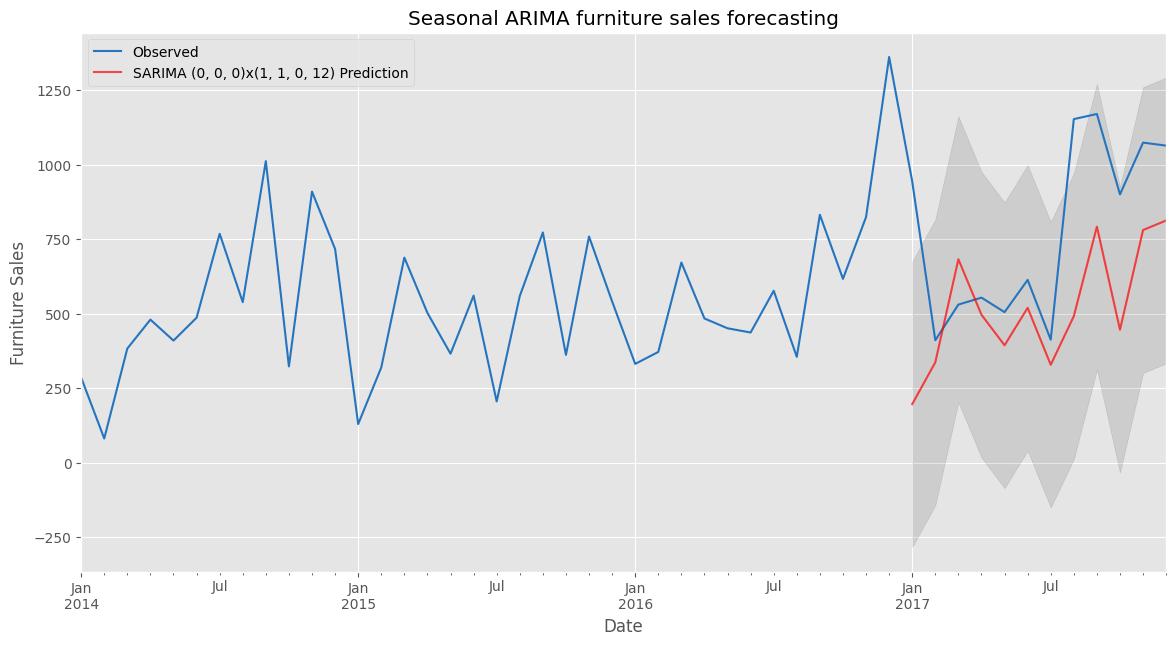

In [81]:
# One step ahead forecast
sarima_predict_1 = sarima_fit_1.get_prediction(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2017-12-01')
                                           ,dynamic=False)
sarima_predict_conf_1 = sarima_predict_1.conf_int()
#observed plot
ax = df.plot(label='Observed',color='#2574BF')
#predicted plot
rcParams['figure.figsize'] = 14, 7
sarima_predict_1.predicted_mean.plot(ax=ax, label='SARIMA (0, 0, 0)x(1, 1, 0, 12) Prediction', alpha= 0.7, color='red')
ax.fill_between(sarima_predict_conf_1.index,
                #lower sales
                sarima_predict_conf_1.iloc[:, 0],
                #upper sales
                sarima_predict_conf_1.iloc[:, 1], color='k', alpha=0.1)
plt.title('Seasonal ARIMA furniture sales forecasting')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.show()

In [82]:
sarima_results=performance(df[-12:],sarima_predict_1.predicted_mean)
sarima_results

{'MSE': 129596.39, 'RMSE': 359.99, 'MAPE': 32.1}

# arima gid search 3

In [83]:
# Define the p, d and q parameters to take a value between 0 and 2
p = d = q = range(0, 2)

# Generate different combinations of p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [84]:
#method 2
warnings.filterwarnings("ignore")
lowest_aic = sys.maxsize
lowest = ''

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(trainset,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

            if lowest_aic >  results.aic:
                lowest = 'SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic)
                lowest_aic = results.aic
        except:
            continue

print ("The lowes AIC belongs to "+lowest)

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:549.5685390879611
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:352.54872404646693
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:323.42066295435876
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:157.37550441133683
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:338.64783848184635
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:323.7337655397455
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:170.04762249076083
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:158.54184893826363
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:517.2748742916806
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:329.691370545805
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:311.58748156653496
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:145.93004854348933
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:340.5984316771282
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:311.4872012896672
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:172.0424547935347
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:147.02618442592131
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:490.4077503664546
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:31

In [85]:
#fitting model
sarima_model_2 = sm.tsa.statespace.SARIMAX(trainset,
                                order=(1, 1, 1),
                                seasonal_order=(0,1,1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
sarima_fit_2 = sarima_model_2.fit()
print(sarima_fit_2.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0692      0.565     -1.892      0.059      -2.177       0.038
ma.L1          0.0356      1.287      0.028      0.978      -2.486       2.557
ma.S.L12      -0.9993      0.777     -1.286      0.198      -2.522       0.524
sigma2      3.776e+04   2.06e-05   1.83e+09      0.000    3.78e+04    3.78e+04


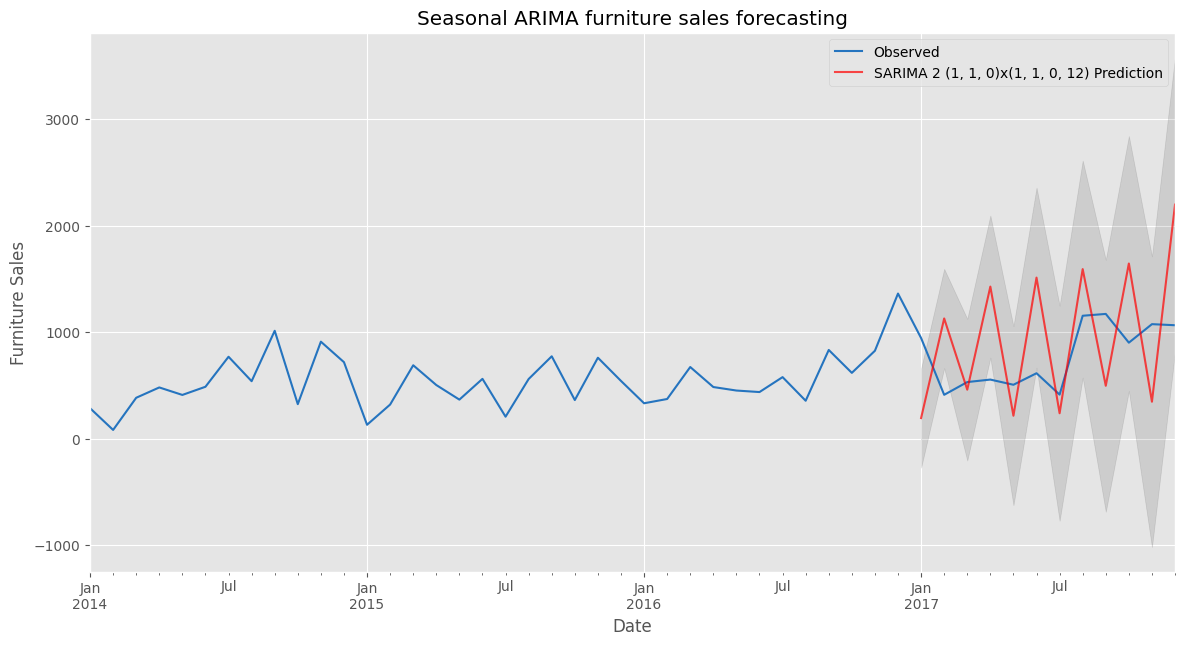

In [86]:
# One step ahead forecast
sarima_predict_2 = sarima_fit_2.get_prediction(start=pd.to_datetime('2017-01-01'), end=pd.to_datetime('2017-12-01')
                                           ,dynamic=False)
sarima_predict_conf_2 = sarima_predict_2.conf_int()
#observed plot
ax = df.plot(label='Observed',color='#2574BF')
#predicted plot
rcParams['figure.figsize'] = 14, 7
sarima_predict_2.predicted_mean.plot(ax=ax, label='SARIMA 2 (1, 1, 0)x(1, 1, 0, 12) Prediction', alpha= 0.7, color='red')
ax.fill_between(sarima_predict_conf_2.index,
                #lower sales
                sarima_predict_conf_2.iloc[:, 0],
                #upper sales
                sarima_predict_conf_2.iloc[:, 1], color='k', alpha=0.1)
plt.title('Seasonal ARIMA furniture sales forecasting')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.show()


In [87]:
sarima_results2=performance(df[-12:],sarima_predict_2.predicted_mean)
sarima_results2

{'MSE': 481492.92, 'RMSE': 693.9, 'MAPE': 85.35}

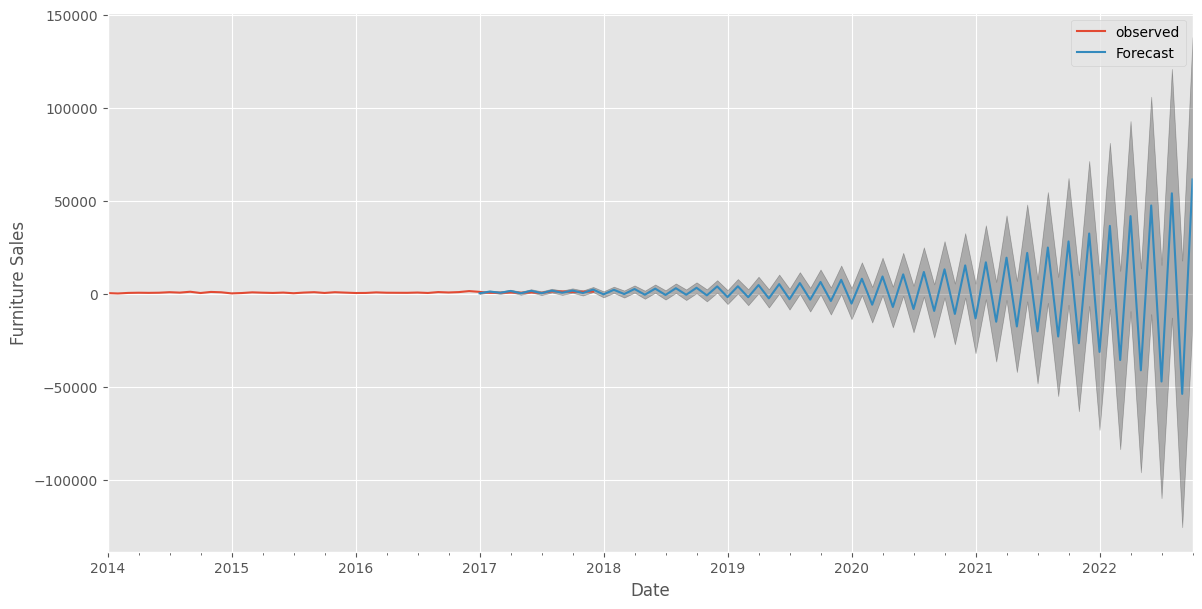

In [88]:
furthur_predict_2 = sarima_fit_2.get_forecast(steps=70)
furthur_conf_2 = furthur_predict_2.conf_int()
ax = df.plot(label='observed', figsize=(14, 7))
furthur_predict_2.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(furthur_conf_2.index,
                furthur_conf_2.iloc[:, 0],
                furthur_conf_2.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

# FORECASTING USING PROPHET

## Prophet First Model

In [89]:
#conda install conda-forge::fbprophet


In [90]:
#pip install pystan

In [91]:
#df_furniture = pd.DataFrame({'order_date':df.index, 'sales':df.values})
df_office_train = pd.DataFrame({'order_date':trainset.index, 'sales':trainset.values})
df_office_test = pd.DataFrame({'order_date':testset.index, 'sales':testset.values})

In [92]:
#conda install -c anaconda ephem

In [93]:
pip install prophet

In [94]:
warnings.filterwarnings("ignore")
#from fbprophet import Prophet
from prophet import Prophet
#df_furniture = df_furniture.rename(columns={'order_date': 'ds', 'sales': 'y'})
df_office_train = df_office_train.rename(columns={'order_date': 'ds', 'sales': 'y'})
df_office_test = df_office_test.rename(columns={'order_date': 'ds', 'sales': 'y'})

In [95]:
# set the uncertainty interval to 95% (Prophet default is 80%)
office_model = Prophet(interval_width=0.95)
#furniture_model.fit(df_furniture)
office_model.fit(df_office_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjdu7xbuf/zcaaw32n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjdu7xbuf/jjmmdg5e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54997', 'data', 'file=/tmp/tmpjdu7xbuf/zcaaw32n.json', 'init=/tmp/tmpjdu7xbuf/jjmmdg5e.json', 'output', 'file=/tmp/tmpjdu7xbuf/prophet_modelokny550a/prophet_model-20240117171730.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:17:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:17:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [96]:
office_forecast = office_model.make_future_dataframe(periods=12, freq='MS')
office_forecast = office_model.predict(office_forecast)

<Figure size 1800x600 with 0 Axes>

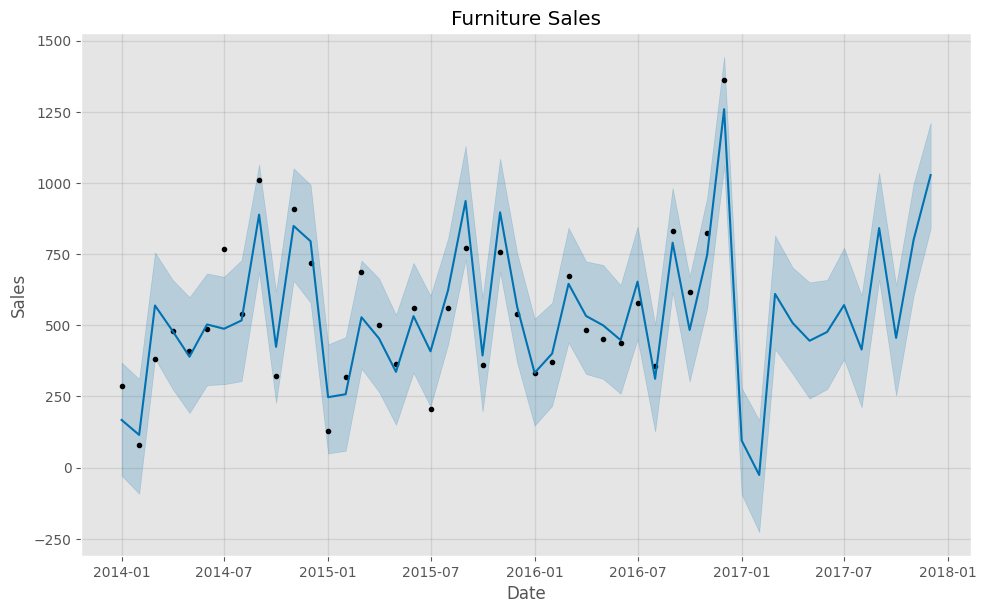

In [97]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales')
plt.show()

In [98]:
office_forecast.drop(columns=['multiplicative_terms', 'multiplicative_terms_lower','multiplicative_terms_upper'])

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,yhat
0,2014-01-01,660.102507,-28.400261,368.622693,660.102507,660.102507,-492.921638,-492.921638,-492.921638,-492.921638,-492.921638,-492.921638,167.180869
1,2014-02-01,660.144627,-91.886571,310.990989,660.144627,660.144627,-545.566428,-545.566428,-545.566428,-545.566428,-545.566428,-545.566428,114.578199
2,2014-03-01,660.182671,382.725551,755.505718,660.182671,660.182671,-90.913979,-90.913979,-90.913979,-90.913979,-90.913979,-90.913979,569.268692
3,2014-04-01,660.224791,276.575192,659.792563,660.224791,660.224791,-180.078718,-180.078718,-180.078718,-180.078718,-180.078718,-180.078718,480.146073
4,2014-05-01,660.265552,191.978903,598.403754,660.265552,660.265552,-270.906991,-270.906991,-270.906991,-270.906991,-270.906991,-270.906991,389.358562
5,2014-06-01,660.307673,289.489670,681.532907,660.307673,660.307673,-157.585496,-157.585496,-157.585496,-157.585496,-157.585496,-157.585496,502.722177
6,2014-07-01,660.348434,292.842162,669.992344,660.348434,660.348434,-172.848768,-172.848768,-172.848768,-172.848768,-172.848768,-172.848768,487.499666
7,2014-08-01,660.390554,303.500390,728.255794,660.390554,660.390554,-143.733289,-143.733289,-143.733289,-143.733289,-143.733289,-143.733289,516.657265
8,2014-09-01,660.432674,686.458994,1064.734874,660.432674,660.432674,228.136146,228.136146,228.136146,228.136146,228.136146,228.136146,888.568820
9,2014-10-01,660.473436,227.392289,617.262889,660.473436,660.473436,-236.436254,-236.436254,-236.436254,-236.436254,-236.436254,-236.436254,424.037182


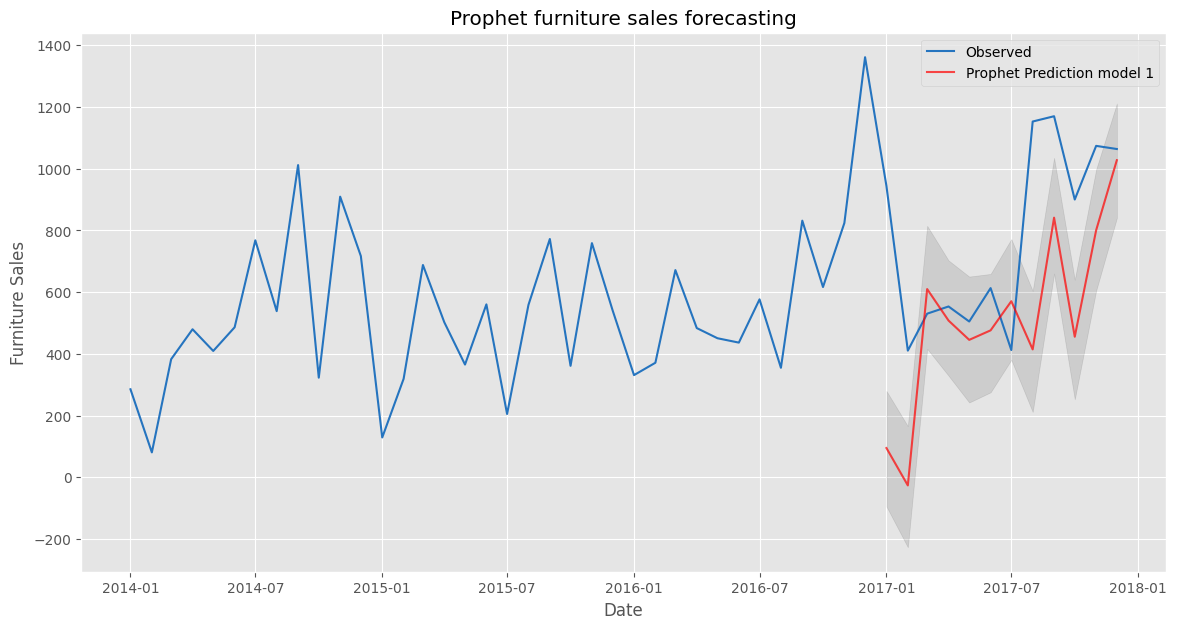

In [99]:
rcParams['figure.figsize'] = 14, 7
plt.plot(df.index, df.values,label='Observed',color='#2574BF')
plt.plot(df[36:48].index,office_forecast[36:48]['yhat'].values,label='Prophet Prediction model 1', alpha= 0.7, color='red')
plt.fill_between(df[36:48].index,
                #lower sales
               office_forecast[36:48]['yhat_lower'].values,
                #upper sales
                office_forecast[36:48]['yhat_upper'].values, color='k', alpha=0.1)
plt.title('Prophet furniture sales forecasting')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.show()

In [100]:
def performance(y_true, y_pred):
    #y_true, y_pred = np.array(y_true), np.array(y_pred)
    mse = ((y_pred - y_true) ** 2).mean()
    mape= np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return( print(' The MSE of forecasts is {}'.format(round(mse, 2))+
                  '\n The RMSE of forecasts is {}'.format(round(np.sqrt(mse), 2))+
                  '\n The MAPE of forecasts is {}'.format(round(mape, 2))))

In [101]:
performance(df[36:48].values, office_forecast[36:48]['yhat'])

 The MSE of forecasts is 157800.49
 The RMSE of forecasts is 397.24
 The MAPE of forecasts is 38.54


## Prophet Second model - applying holiday

In [102]:
#add holidays
christmas_holidays = pd.DataFrame({'holiday': "Christmass Day", 'ds' : pd.to_datetime(['2014-12-25', '2015-12-25','2016-12-25'])})
# more accurate without holidays!
office_model2 = Prophet(yearly_seasonality=True, holidays=christmas_holidays)
#furniture_model2.fit(df_furniture)
office_model2.fit(df_office_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjdu7xbuf/zb52wizf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjdu7xbuf/icy7enyi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9507', 'data', 'file=/tmp/tmpjdu7xbuf/zb52wizf.json', 'init=/tmp/tmpjdu7xbuf/icy7enyi.json', 'output', 'file=/tmp/tmpjdu7xbuf/prophet_modeluevkb5j1/prophet_model-20240117171733.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:17:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:17:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [103]:
office_forecast2 = office_model2.make_future_dataframe(periods=36, freq='MS')
office_forecast2 = office_model2.predict(office_forecast2)

<Figure size 1800x600 with 0 Axes>

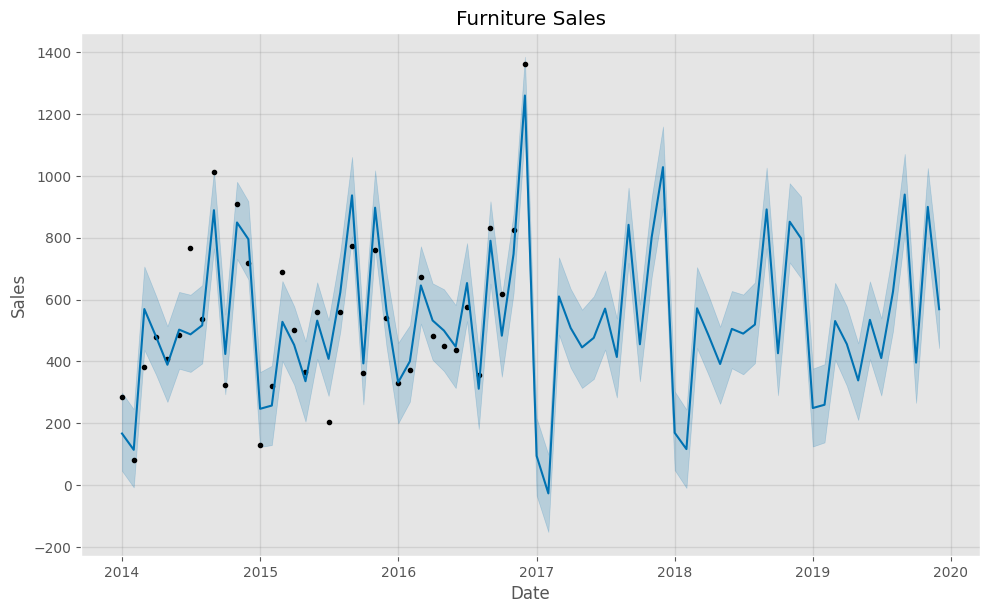

In [104]:
plt.figure(figsize=(18, 6))
office_model2.plot(office_forecast2, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales')
plt.show()

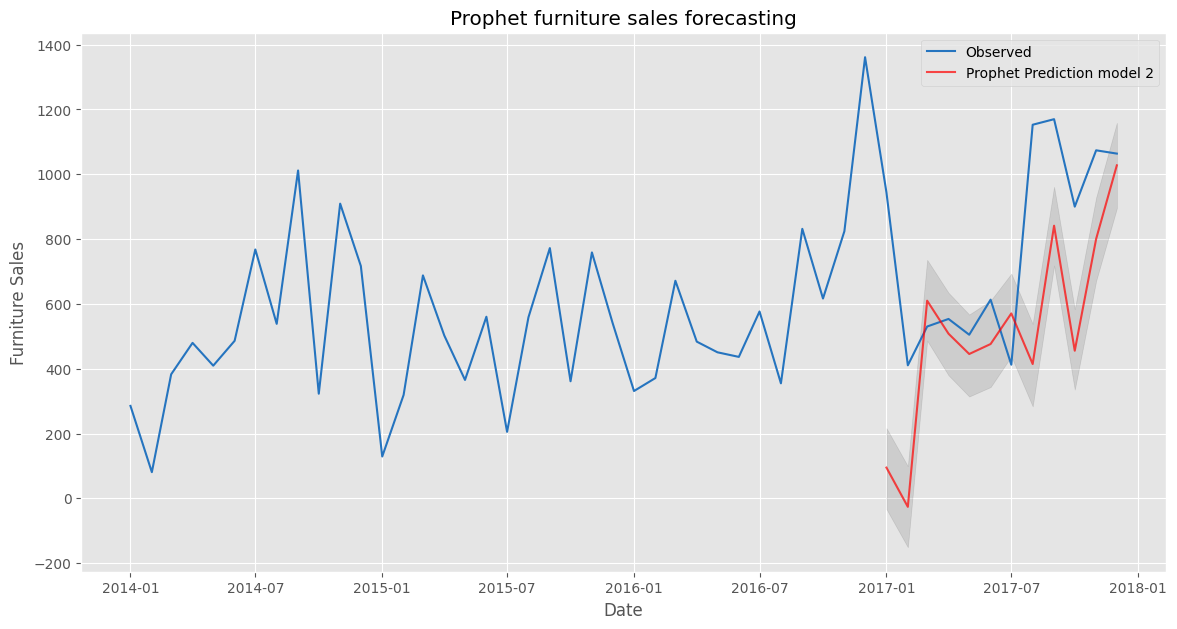

In [105]:
rcParams['figure.figsize'] = 14, 7
plt.plot(df.index, df.values,label='Observed',color='#2574BF')
plt.plot(df[36:48].index,office_forecast2[36:48]['yhat'].values,label='Prophet Prediction model 2', alpha= 0.7, color='red')
plt.fill_between(df[36:48].index,
                #lower sales
                office_forecast2[36:48]['yhat_lower'].values,
                #upper sales
                office_forecast2[36:48]['yhat_upper'].values, color='k', alpha=0.1)
plt.title('Prophet furniture sales forecasting')
plt.xlabel('Date')
plt.ylabel('Furniture Sales')
plt.legend()
plt.show()

In [106]:
performance(df[36:48].values,  office_forecast2[36:48]['yhat'])

 The MSE of forecasts is 157800.49
 The RMSE of forecasts is 397.24
 The MAPE of forecasts is 38.54
